# Analyzing my Spotify Playlists 🎶

## General Process
##### I connected to the Spotify web API using the instructions provided from the link above, and was granted a client ID, and a client secret key. With these credentials, I requested an access token and was successfully able to make calls to the Spotify web API. I then made calls to the Spotify API using the imported Python library, Spotipy, to retrieve data such as music features. I then compiled the extracted data into a pandas dataframe. There was not much data cleaning to be done, as I essentially collected the data myself. I created a graph showing which genres of music I like the most using the dataframe.

### Connect to the Spotify API

In [2]:
# Import all libraries used throughout the notebook
#import os
# TRY TO CREATE ENV FOR API KEYS from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from requests import post
import base64
import json
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plot

In [3]:
# Construct variables to hold access credentials needed in order to connect 
# with the SpotifY API

my_id = "57619a02d735467d97e9f5fcc6b264cc"
my_secret_key = "f4e9db72af4e46868b418ba4e68beb7e"
redirect_uri = "http://localhost:3000"

# Authenticate with Spotify
sp = spotipy.Spotify(auth_manager = SpotifyOAuth(client_id = my_id,
                                               client_secret = my_secret_key,
                                               redirect_uri = redirect_uri,
                                               scope = "playlist-read-private user-read-recently-played"))

#### Retrieving an Access Token

In [4]:
# Retrieving a token
def get_token():
    authorization_string = my_id + ":" + my_secret_key
    authorization_bytes = authorization_string.encode("utf-8")
    authorization_base64 = str(base64.b64encode(authorization_bytes), "utf-8")
    
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + authorization_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers = headers, data = data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

token = get_token()
#print(token)

def get_authorization_header(token):
    return{"Authorization": "Bearer " + token}

#### After running the above cell, a seperate webpage opens to confirm allowing access to my personal Spotify account. After clicking the 'Agree' button, we have successfully connected to my Spotify account, the webpage is displayed in the screenshot below. We can now begin to analyze my Spotify account! 🎉

In [5]:
Image(url = "https://github.com/ppatel0910/mySpotify_and_machine_learning/blob/main/images/spotify_token_redirect.png",
     height = 300)

### Extracting my Music

In [6]:
# Retrieve the album ID from all my current playlists, with the album IDs I can
# analyze the playlists of my choosing 

playlists = sp.current_user_playlists(limit = 50, offset=0)
for playlist in playlists['items']:
    print("Playlist:", playlist['name'])
    print("Playlist ID:", playlist['id'])
    print()

Playlist: Beautiful Things
Playlist ID: 4jBNp0HyRsdaW2mreEEBmy

Playlist: gymcore
Playlist ID: 37i9dQZF1DX5n5gZBZb0AT

Playlist: Your Top Songs 2023
Playlist ID: 37i9dQZF1Fa1IIVtEpGUcU

Playlist: phonk
Playlist ID: 37i9dQZF1DWWY64wDtewQt

Playlist: ☠️
Playlist ID: 36sWCIuz8qsiR24qNBMGKt

Playlist: yea
Playlist ID: 3Z4JXpMvdFtSfwlt5UOVeM

Playlist: ♨️
Playlist ID: 4SFa1odhkTaQen705xiObH

Playlist: 💰💰💰💰💰💰💰💰💰💰💰💰💰
Playlist ID: 4xrHb5Wju7CKwgR06dxKQn

Playlist: ✨
Playlist ID: 52SUls5Z9UfIwwUuQdzZfx

Playlist: Your Top Songs 2022
Playlist ID: 37i9dQZF1F0sijgNaJdgit

Playlist: Your Top Songs 2021
Playlist ID: 37i9dQZF1EUMDoJuT8yJsl

Playlist: Your Top Songs 2020
Playlist ID: 37i9dQZF1EM8XokzgDW8MX

Playlist: random
Playlist ID: 0pEkOWP7xIHk0RkucmGQ5I

Playlist: NEW SPANISH TRAP
Playlist ID: 0MCNQTgcmJOdA5RaYQZbjT

Playlist: Spanish Trap
Playlist ID: 4GkuLJQ4zte0yYF0msUNtw

Playlist: Eklavya + Priya
Playlist ID: 37i9dQZF1EJtpC3JTdWYfV

Playlist: hot girl
Playlist ID: 5xYfCE46cAGAFdZimcs9yC

Pl

In [7]:
# I can recognize most of my playlists from the results, but I cannot tell what 
# is in the playlist "Liked from Radio". List all the songs in the playlist to 
# decide if it should be included in my dataset.  


# Define the function 'get_all_tracks_from_playlist' to list all of the songs 
# in a playlist

def get_all_tracks_from_playlist(playlist_id):
    tracks_response = sp.playlist_tracks(playlist_id)
    tracks = tracks_response["items"]
    while tracks_response["next"]:
        tracks_response = sp.next(tracks_response)
        tracks.extend(tracks_response["items"])

    return tracks

playlist_ID = "3v6ycwFEJSMECHK2OAO8Px"
tracks = get_all_tracks_from_playlist(playlist_ID)

print("Number of tracks in the playlist:", len(tracks))

for track in tracks:
    print(track["track"]["name"])

Number of tracks in the playlist: 103
Te Lo Meto Yo (feat. Bad Bunny, Lary Over, Farruko, Arcangel & Tempo)
Drinks On Us
No Option
I Told You/ Another One
goosebumps
In For It
F*ck Up Some Commas
Controlla
Friends With Benefits
Too Good
Controlla
through the late night
Friends With Benefits
Pull Up (feat. Lil Uzi Vert)
Don't
pick up the phone
Sorry Not Sorry
Acquainted
Far Alone (feat. E-40 & Jay Ant)
A-Team
Tumblr Girls (feat. Christoph Andersson)
G.O.M.D.
Don't Let Me Go (feat. SAYGRACE)
Jumpman
One Dance
Sober
4u
Verbatim
Idfc
What If (feat. Gizzle)
untitled 07 | 2014 - 2016
Low Life (feat. The Weeknd)
One Of Them (feat. Big Sean)
Change Locations
Stuck On U
Traphouse
A-Team
In For It
One Day
Remembrance Day
Change Locations
Stuck On U
Acting Like
LA Confidential
Exchange
Pop Style
One Day
Wicked
Come and See Me (feat. Drake)
Back Up (feat. Big Sean)
502 Come Up
Handsome And Wealthy
N.I.N.A
By Chance
Comfortable
Hotline Bling
Antidote
Planez
Traphouse
Wavy (feat. Joe Moses)
Come and

In [8]:
# Using tke playlist ID's extracted above, I created a list of dictionaries to
# hold only the playlists I wanted to include in my dataset (the playlist 
# examined above was included in this dataset). 

playlist_ids = [{"album_id" : "37i9dQZF1DX5n5gZBZb0AT", "category" : "phonk", "year" : "2023"},
               {"album_id" : "37i9dQZF1Fa1IIVtEpGUcU", "category" : "spotifyWrapped_2023", "year" : "2023"},
               {"album_id" : "36sWCIuz8qsiR24qNBMGKt", "category" : "phonk", "year" : "2023"},
               {"album_id" : "3Z4JXpMvdFtSfwlt5UOVeM", "category" : "friend_playlist", "year" : "2023"},
               {"album_id" : "4SFa1odhkTaQen705xiObH", "category" : "friend_playlist", "year" : "2023"},
               {"album_id" : "4xrHb5Wju7CKwgR06dxKQn", "category" : "friend_playlist", "year" : "2023"},
               {"album_id" : "52SUls5Z9UfIwwUuQdzZfx", "category" : "pop_hip_hop", "year" : "2022"},
               {"album_id" : "37i9dQZF1F0sijgNaJdgit", "category" : "spotifyWrapped2022", "year" : "2022"},
               {"album_id" : "37i9dQZF1EUMDoJuT8yJsl", "category" : "spotifyWrapped2021", "year" : "2021"},
               {"album_id" : "37i9dQZF1EM8XokzgDW8MX", "category" : "spotifyWrapped2020", "year" : "2020"},
               {"album_id" : "0pEkOWP7xIHk0RkucmGQ5I", "category" : "random", "year" : "2021"},
               {"album_id" : "0MCNQTgcmJOdA5RaYQZbjT", "category" : "spanish", "year" : "2021"},
               {"album_id" : "4GkuLJQ4zte0yYF0msUNtw", "category" : "spanish", "year" : "2021"},
               {"album_id" : "37i9dQZF1EJtpC3JTdWYfV", "category" : "friend_blend", "year" : "2021"},
               {"album_id" : "5xYfCE46cAGAFdZimcs9yC", "category" : "pop_hip_hop", "year" : "2021"},
               {"album_id" : "7dwO2ZUlYDNWhgow20wMnO", "category" : "bollywood", "year" : "2022"},
               {"album_id" : "1gaWVbmoLFU0AnLBKNcxcc", "category" : "friend_playlist", "year" : "2022"},
               {"album_id" : "1GtkxWoPEOnNOzcf1GFae5", "category" : "sad", "year" : "2020"},
               {"album_id" : "5R5B9HPAtIo2k1qQZ97T1Q", "category" : "alt", "year" : "2021"},
               {"album_id" : "5R5B9HPAtIo2k1qQZ97T1Q", "category" : "alt", "year" : "2021"},
               {"album_id" : "0yPNZjVb7wp6b0dpOUuNby", "category" : "hip_hop", "year" : "2020"},
               {"album_id" : "2nhWIzWoNWOkJx02i9vqIa", "category" : "pop_hip-hop", "year" : "2020"},
               {"album_id" : "279x6EFu5xYeJW3pvaDp3W", "category" : "pop_alt", "year" : "2020"},
               {"album_id" : "5XKNLddyL1zuK2oDMzJ6cM", "category" : "pop", "year" : "2020"},
               {"album_id" : "44tglVDSpkZ1jUHRQP5mh8", "category" : "hip_hop", "year" : "2020"},
               {"album_id" : "0nQ0jU9msWXjHu121CFL4P", "category" : "pop_hip_hop", "year" : "2020"},
               {"album_id" : "37i9dQZF1DXdPec7aLTmlC", "category" : "pop", "year" : "2020"},
               {"album_id" : "37i9dQZF1DWXnexX7CktaI", "category" : "hip_hop_r&b", "year" : "2020"},
               {"album_id" : "1hoN2uRdSpWPT8dBAgKhdV", "category" : "love", "year" : "2021"},
               {"album_id" : "25My4V69yNZG43slhcLccD", "category" : "friend_playlist", "year" : "2019"},
               {"album_id" : "17BCQRLJgoC6Tps8N3QIIX", "category" : "hip_hop", "year" : "2019"},
               {"album_id" : "7vEW37HpfVBlQo33iZy40b", "category" : "random", "year" : "2019"},
               {"album_id" : "37i9dQZF1CyM4aoWzGuoJ5", "category" : "spotifyWrapped2016", "year" : "2016"},
               {"album_id" : "37i9dQZF1DWTDafB3skWPN", "category" : "hip_hop", "year" : "2017"},
               {"album_id" : "37i9dQZF1DX4eRPd9frC1m", "category" : "edm", "year" : "2017"},
               {"album_id" : "4Eb48BrseYB5NRZabc6SZC", "category" : "hip_hop", "year" : "2016"},
               {"album_id" : "37i9dQZF1DX3YSRoSdA634", "category" : "sad", "year" : "2020"},
               {"album_id" : "3v6ycwFEJSMECHK2OAO8Px", "category" : "pop_hip_hop", "year" : "2016"}]


# Create a pandas datafame from 'playlists_id', and review the dataframe

df = pd.DataFrame(playlist_ids, columns = ["album_id", "category", "year"])
df["year"] = pd.to_datetime(df["year"]).dt.strftime('%Y')
df.title = "Priya's Playlists"
df

,album_id,category,year
0,37i9dQZF1DX5n5gZBZb0AT,phonk,2023
1,37i9dQZF1Fa1IIVtEpGUcU,spotifyWrapped_2023,2023
2,36sWCIuz8qsiR24qNBMGKt,phonk,2023
3,3Z4JXpMvdFtSfwlt5UOVeM,friend_playlist,2023
4,4SFa1odhkTaQen705xiObH,friend_playlist,2023
5,4xrHb5Wju7CKwgR06dxKQn,friend_playlist,2023
6,52SUls5Z9UfIwwUuQdzZfx,pop_hip_hop,2022
7,37i9dQZF1F0sijgNaJdgit,spotifyWrapped2022,2022
8,37i9dQZF1EUMDoJuT8yJsl,spotifyWrapped2021,2021
9,37i9dQZF1EM8XokzgDW8MX,spotifyWrapped2020,2020


In [ ]:
df

In [13]:
# Organize the dataframe based on the 'category' column 

playlists_df = df.sort_values(by = "category")
playlists_df

,album_id,category,year
18,5R5B9HPAtIo2k1qQZ97T1Q,alt,2021
19,5R5B9HPAtIo2k1qQZ97T1Q,alt,2021
15,7dwO2ZUlYDNWhgow20wMnO,bollywood,2022
34,37i9dQZF1DX4eRPd9frC1m,edm,2017
13,37i9dQZF1EJtpC3JTdWYfV,friend_blend,2021
29,25My4V69yNZG43slhcLccD,friend_playlist,2019
4,4SFa1odhkTaQen705xiObH,friend_playlist,2023
3,3Z4JXpMvdFtSfwlt5UOVeM,friend_playlist,2023
5,4xrHb5Wju7CKwgR06dxKQn,friend_playlist,2023
16,1gaWVbmoLFU0AnLBKNcxcc,friend_playlist,2022


<Axes: title={'center': 'Number of Playlists in Each Category'}, xlabel='Playlist Category', ylabel='Quantity'>

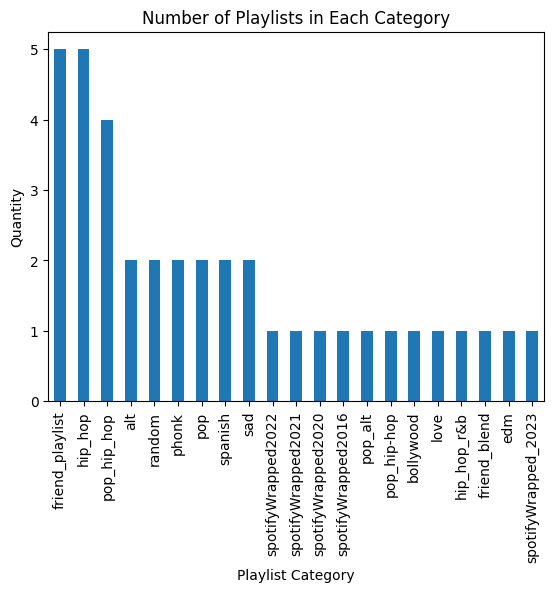

In [10]:
# Determine the number of playlists in each category, and plot the results
# using the matplotlib Python library

category_count = playlists_df["category"].value_counts()
category_count.plot(kind = "bar",
                    title = "Number of Playlists in Each Category",
                   xlabel = "Playlist Category",
                   ylabel = "Quantity")

#### My top categories for my playlists are hip-hop and ironically, my friends music. These categories were personally assigned by me. I decided to categorize  specific dataframes based on similiar categories. For example, a dataframe containing the playlist ID's for all of my Spotify Wrapped playlists will be constructed, and a seperate dataframe for hip-hop playlists.

In [ ]:
# Retrieve recently played songs by the user (me)

recent = sp.current_user_recently_played()
while recent:
    for item in recent["items"]:
        print(item["track"]["name"])
    if recent["next"]:
        recents = sp.next(recent)
    else:
        recents = None
#Havre to stop the loop somehow

In [ ]:
https://www.youtube.com/watch?v=oNyaiWgqKDI

In [ ]:
https://developer.spotify.com/documentation/web-api/tutorials/code-flow

In [ ]:
https://developer.spotify.com/documentation/web-api/tutorials/getting-started

In [ ]:
https://levelup.gitconnected.com/music-analysis-with-spotify-api-59c080734c6e

In [ ]:
https://developer.spotify.com/documentation/web-api/howtos/web-app-profile

In [ ]:
https://developer.spotify.com/documentation/web-api/reference/get-recommendations

In [ ]:
https://developer.spotify.com/documentation/web-api/concepts/scopes#playlist-read-private

In [ ]:
https://developer.spotify.com/documentation/web-api/tutorials/code-flow